In [ ]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
! wget -O housing_price.csv https://www.dropbox.com/scl/fi/nuwx0rc3evfepecj91z7h/housing_price.csv?rlkey=hnnji32z8mj1wc7a9vsutd3ev&dl=0

--2023-09-02 06:12:41--  https://www.dropbox.com/scl/fi/nuwx0rc3evfepecj91z7h/housing_price.csv?rlkey=hnnji32z8mj1wc7a9vsutd3ev
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/nuwx0rc3evfepecj91z7h/housing_price.csv?rlkey=hnnji32z8mj1wc7a9vsutd3ev [following]
--2023-09-02 06:12:42--  https://www.dropbox.com/e/scl/fi/nuwx0rc3evfepecj91z7h/housing_price.csv?rlkey=hnnji32z8mj1wc7a9vsutd3ev
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc34ea6b27632b7dc52ee00eae72.dl.dropboxusercontent.com/cd/0/inline/CC-I1qeXMjH_D0643wWxiTVY5bl1wk6UQtra5l9oTajoVFLyOkVTNcgYXk8ST0mhQchTAkRrqV-OKd8BLJ_GxZYenL-fhfOEugdV-J0UDDOCQfgUGww9j5ftLGEZpP5HvTvI1Px4BFfuvfrWCKsX0and/file# [following]
--2023-09-02 06:12:42--  https://uc34ea

In [ ]:
data= pd.read_csv ('housing_price.csv')
data.head() # untuk melihat beberapa baris pertama dari data

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


In [ ]:
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


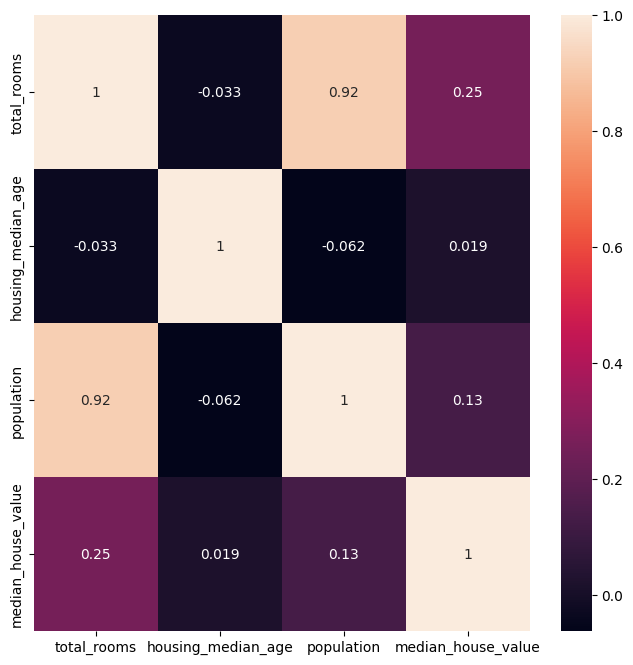

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Hasil analisis korelasi menunjukkan bahwa:

semua feature berkorelasi positif terhadap median house value, tetapi korelasi tersebut tidak signifikan.

In [ ]:
X = data.iloc[:, :-1]
Y= data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
print('Ukuran training data dan testing data:')
print('Training dataset : ', X_train.shape, y_train.shape)
print('Testing dataset :', X_test.shape, y_test.shape)

Ukuran training data dan testing data:
Training dataset :  (80, 3) (80,)
Testing dataset : (20, 3) (20,)


In [ ]:
# TRAINING MODEL REGRESI LINEAR
LinearReg= LinearRegression().fit(X_train, y_train)
# TRAINING MODEL LASSO
LassoReg= Lasso(alpha=0.1).fit(X_train, y_train)
# TRAINING MODEL RIDGE
RidgeReg=Ridge(alpha=0.1).fit(X_train, y_train)
# TRAINING MODEL SVR
SVReg=SVR().fit(X_train, y_train)
# TRAINING MODEL DIR
DTReg=DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

In [ ]:
#HASIL PREDIKSI MODEL REGRESI LINEAR
ypredtrain_reglin=LinearReg.predict(X_train)
ypredtest_reglin=LinearReg.predict(X_test)
#HASIL PREDIKSI MODEL LASSO
ypredtrain_lasso=LassoReg.predict(X_train)
ypredtest_lasso=LassoReg.predict(X_test)
#HASIL PREDIKSI MODEL SVR
ypredtrain_svr=SVReg.predict(X_train)
ypredtest_svr=SVReg.predict(X_test)
#HASIL PREDIKSI MODEL RIDGE
ypredtrain_ridge=RidgeReg.predict(X_train)
ypredtest_ridge=RidgeReg.predict(X_test)
#HASIL PREDIKSI MODEL DTR
ypredtrain_dtr=DTReg.predict(X_train)
ypredtest_dtr=DTReg.predict(X_test)


In [ ]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linear = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linear = ', mean_squared_error(y_test, ypredtest_reglin), '\n')
# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')
# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge  = ', mean_squared_error(y_test, ypredtest_ridge), '\n')
# MSE model SVR
print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')
# MSE model DTR
print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')

Nilai MSE data training Regresi Linear =  4803094063.322078
Nilai MSE data testing Regresi Linear =  8127181805.970065 

Nilai MSE data training Regresi Lasso =  4803094063.322152
Nilai MSE data testing Regresi Lasso =  8127181788.923589 

Nilai MSE data training Regresi Ridge =  4803094063.322078
Nilai MSE data testing Regresi Ridge  =  8127181827.757988 

Nilai MSE data training Regresi SVR =  5948408542.012653
Nilai MSE data testing Regresi SVR =  9903742443.12862 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  14219714500.0 



In [ ]:
# R^2 Score
print(f'R^2 score Regresi Linear: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {SVReg.score(X, Y)}')
print(f'R^2 score Regresi DT: {DTReg.score(X, Y)}')

R^2 score Regresi Linear: 0.1312824745405794
R^2 score Regresi Lasso: 0.1312824750822238
R^2 score Regresi Ridge: 0.13128247384826552
R^2 score Regresi SVR: -0.0707379234400054
R^2 score Regresi DT: 0.5481669759838637


Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

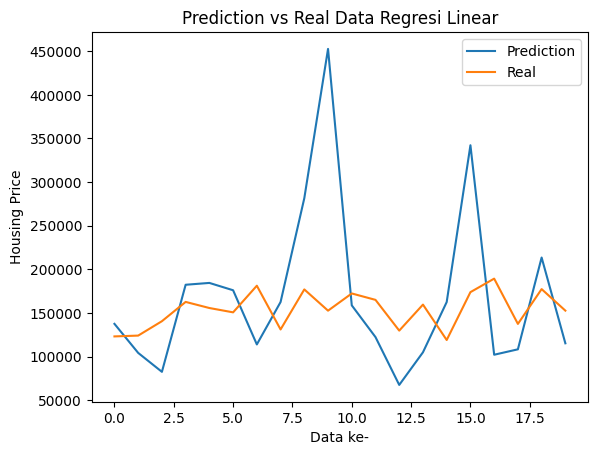

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linear')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

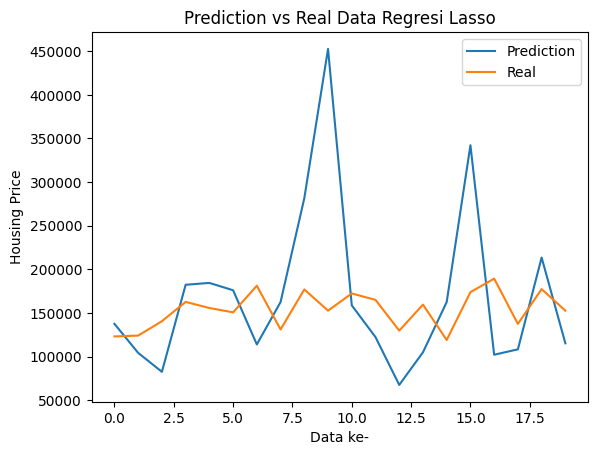

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Lasso')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

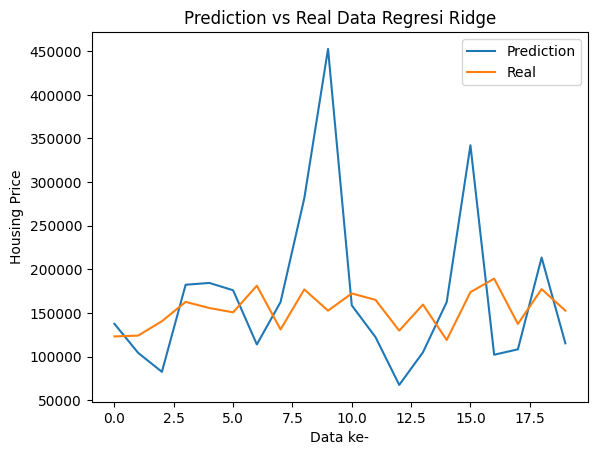

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Ridge')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

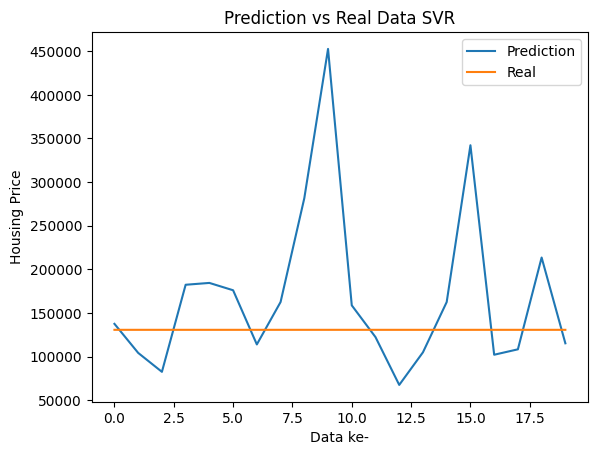

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

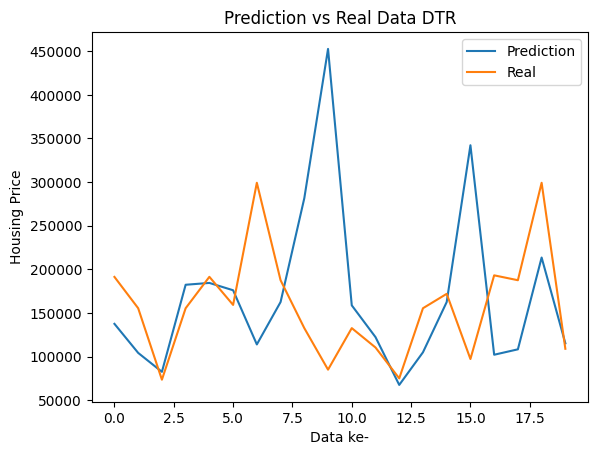

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

Perlu diperhatikan bahwa model terbaik yang didapatkan pada data ini bukanlah model yang terbaik untuk memprediksi. Hal ini dapat dibuktikan dengan hasil yang didapatkan pada tahap sebelumnya yang mengindikasikan model DTR pun belum dapat dikatakan sebagai bahan prediksi yang optimal.

In [ ]:
#INPUT DATA BARU
total_rooms = float(input('Input Total Rooms \t= '))
housing_median_age = float(input('Input Housing Median Age \t= '))
population = float(input('Input Population \t= '))
data_baru=[[total_rooms, housing_median_age, population]]

#PREDIKSI DATA BARU MENGGUNAKAN MODEL DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float (hasil_prediksi)

#CETAK HASIL PREDIKSI (Price)
print('\nPrediksi Housing Price', hasil_prediksi)

Input Total Rooms 	= 400
Input Housing Median Age 	= 45
Input Population 	= 5600

Prediksi Housing Price 137500.0
